In [1]:
#pip install git+https://github.com/xdf-modules/pyxdf.git

  Cloning https://github.com/xdf-modules/pyxdf.git to c:\users\aquar\appdata\local\temp\pip-req-build-3ileuc5t
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/xdf-modules/pyxdf.git 'C:\Users\aquar\AppData\Local\Temp\pip-req-build-3ileuc5t'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/xdf-modules/pyxdf.git 'C:\Users\aquar\AppData\Local\Temp\pip-req-build-3ileuc5t'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [1]:
import pyxdf
#sample code from link https://github.com/xdf-modules/pyxdf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data, header = pyxdf.load_xdf('C:/Users/Sowmya/QOE_CWI/Selected_PID_data/P11/sub-P11_ses-S1_task-Default_run-001_eeg.xdf')

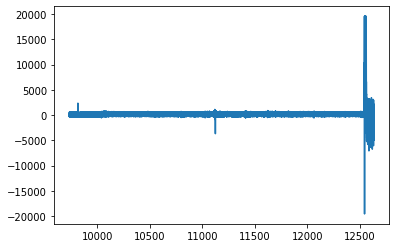

In [3]:
for stream in data:
    y = stream['time_series']

    if isinstance(y, list):
        # list of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            plt.axvline(x=timestamp)
            print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
    elif isinstance(y, np.ndarray):
        # numeric data, draw as lines
        plt.plot(stream['time_stamps'], y)
    else:
        raise RuntimeError('Unknown stream format')

plt.show()

In [3]:
for stream in data:
    y = stream['time_series']
    t = stream["time_stamps"]
    


In [5]:
from collections import defaultdict
info = data[0]['info']
print(info)

def extract_values(data):
    values = []
    for key, value in data.items():
        if isinstance(value, list) and len(value) == 1:
            values.extend(value)  # Append single-value lists to 'values'
        elif isinstance(value, dict) or isinstance(value, defaultdict):
            values.extend(extract_values(value))  # Recursively call for nested structures
    return values

# Get all values from the nested structure
all_values = extract_values(info)

# Display all extracted values
for index, value in enumerate(all_values, start=1):
    print(f"Value {index}: {value}")

defaultdict(<class 'list'>, {'name': ['Polar H10 BFA24F21'], 'type': ['ECG'], 'channel_count': ['1'], 'channel_format': ['float32'], 'source_id': ['myuid2424'], 'nominal_srate': ['130.0000000000000'], 'version': ['1.100000000000000'], 'created_at': ['9699.451994999999'], 'uid': ['1a600a85-b6e7-4994-99ef-954bc8255a26'], 'session_id': ['default'], 'hostname': ['DESKTOP-UGL4IEM'], 'v4address': [None], 'v4data_port': ['16572'], 'v4service_port': ['16572'], 'v6address': [None], 'v6data_port': ['16572'], 'v6service_port': ['16572'], 'desc': [defaultdict(<class 'list'>, {'manufacturer': ['Polar'], 'channels': [defaultdict(<class 'list'>, {'channel': [defaultdict(<class 'list'>, {'name': ['ECG'], 'unit': ['microvolts'], 'type': ['ECG']})]})]})], 'stream_id': 1, 'effective_srate': 130.03343819721346})
Value 1: Polar H10 BFA24F21
Value 2: ECG
Value 3: 1
Value 4: float32
Value 5: myuid2424
Value 6: 130.0000000000000
Value 7: 1.100000000000000
Value 8: 9699.451994999999
Value 9: 1a600a85-b6e7-4994

In [4]:
footer = data[0]['footer']
#print(footer)

# Function to extract keys and values from the nested structure
def extract_keys_values(data, keys=None):
    if keys is None:
        keys = []
    values = []
    for key, value in data.items():
        if isinstance(value, list) and len(value) == 1:
            keys.append(key)
            values.extend(value)
        elif isinstance(value, dict) or isinstance(value, defaultdict):
            nested_keys, nested_values = extract_keys_values(value, keys + [key])
            keys.extend(nested_keys)
            values.extend(nested_values)
    return keys, values

# Get keys and values from the nested structure
all_keys_footer, all_values_footer = extract_keys_values(footer)

# Combine keys and values into a DataFrame
#footerinfo = pd.DataFrame({'Keys': all_keys_footer, 'Values': all_values_footer})
print(all_keys_footer[1])
print(all_values_footer[0])
print(all_values_footer[3])

first_timestamp
9731.775606200001
defaultdict(<class 'list'>, {'offset': [defaultdict(<class 'list'>, {'time': ['9723.6755851'], 'value': ['6.000009307172149e-07']}), defaultdict(<class 'list'>, {'time': ['9728.67573155'], 'value': ['-5.500005499925464e-07']}), defaultdict(<class 'list'>, {'time': ['9733.675932800001'], 'value': ['1.999997039092705e-07']}), defaultdict(<class 'list'>, {'time': ['9738.6761307'], 'value': ['-8.999995770864189e-07']}), defaultdict(<class 'list'>, {'time': ['9743.67929625'], 'value': ['1.164999957836699e-05']}), defaultdict(<class 'list'>, {'time': ['9748.6859623'], 'value': ['-4.600000465870835e-06']}), defaultdict(<class 'list'>, {'time': ['9753.699982849999'], 'value': ['-4.249999619787559e-06']}), defaultdict(<class 'list'>, {'time': ['9758.714485500001'], 'value': ['-3.190000006725313e-05']}), defaultdict(<class 'list'>, {'time': ['9763.72892765'], 'value': ['-1.105000046663918e-05']}), defaultdict(<class 'list'>, {'time': ['9768.73284805'], 'value': 

In [6]:
# Function to extract keys and values from the nested structure
def extract_keys_values(data, keys=None):
    if keys is None:
        keys = []
    values = []
    for key, value in data.items():
        if isinstance(value, list) and len(value) == 1:
            keys.append(key)
            values.extend(value)
        elif isinstance(value, dict) or isinstance(value, defaultdict):
            nested_keys, nested_values = extract_keys_values(value, keys + [key])
            keys.extend(nested_keys)
            values.extend(nested_values)
    return keys, values

# Get keys and values from the nested structure
all_keys, all_values = extract_keys_values(info)

# Combine keys and values into a DataFrame
deviceinfo = pd.DataFrame({'Keys': all_keys, 'Values': all_values})

# Display the DataFrame
print(deviceinfo)

NameError: name 'info' is not defined

In [7]:
for key, value in header.items():
    print(f"Key: {key}, Value: {value}")

Key: info, Value: defaultdict(<class 'list'>, {'version': ['1.0'], 'datetime': ['2023-08-09T15:34:55+0100']})


In [8]:
datetime_value = header['info']['datetime'][0]
print(f"Datetime information: {datetime_value}")

Datetime information: 2023-08-09T15:34:55+0100


In [9]:
for stream in data:
    y_list = stream['time_series'].tolist()
    t_list = stream["time_stamps"].tolist()

ecg_data_df = pd.DataFrame(list(zip(t,y)), columns= ('time','ECG'))



In [42]:
ecg_data_df.to_csv("C:/Users/Sowmya/QOE_CWI/Recorded RCQoEA Data/Sowmya_csv.csv")

In [10]:
# Given values
time_given_seconds = 9731.5453469964
time_given_formatted = "15:34:55"
print(f"Start time: {time_given_formatted}")

# Convert time to total seconds
hours, minutes, seconds = map(float, time_given_formatted.split(':'))
time_given_total_seconds = hours * 3600 + minutes * 60 + seconds

# Calculate the ratio of time to seconds
ratio = time_given_seconds / time_given_total_seconds
print('ratio:', ratio)
# Time in seconds for 12632.8221645071 seconds
time_new_seconds = 12632.8221645071

# Calculate the time for the new seconds
time_new = ratio * time_new_seconds

# Convert seconds back to hours, minutes, and seconds
hours_new = int(time_new / 3600)
minutes_new = int((time_new % 3600) / 60)
seconds_new = time_new % 60

# Format the time as "HH:MM:SS.sss"
time_new_formatted = f"{hours_new:02}:{minutes_new:02}:{seconds_new:06.3f}"

# Function to add two times in HH:MM:SS.sss format
def add_times(time1, time2):
    hours, minutes, seconds = map(float, time1.split(':'))
    total_seconds = hours * 3600 + minutes * 60 + seconds

    hours, minutes, seconds = map(float, time2.split(':'))
    total_seconds += hours * 3600 + minutes * 60 + seconds

    hours_total = int(total_seconds // 3600)
    minutes_total = int((total_seconds % 3600) // 60)
    seconds_total = total_seconds % 60

    return f"{hours_total:02}:{minutes_total:02}:{seconds_total:06.3f}"

# Add time_new_formatted to time_given_formatted
result_time = add_times(time_given_formatted, time_new_formatted)

print(f"Resultant time: {result_time}")


print(f"Time for {time_new_seconds} seconds: {hours_new} hours {minutes_new} minutes {seconds_new:.3f} seconds")


Start time: 15:34:55
ratio: 0.17348329346637667
Resultant time: 16:11:26.584
Time for 12632.8221645071 seconds: 0 hours 36 minutes 31.584 seconds


In [28]:
from datetime import datetime

# Given datetime information
given_datetime_str = '2023-08-09T15:34:55+0100'

# Parse the string into a datetime object
given_datetime = datetime.strptime(given_datetime_str, '%Y-%m-%dT%H:%M:%S%z')

# Extract only the date portion (year-month-day)
date_only = given_datetime.date()

print(f"Date Only: {date_only}")

# Given values
time_given_seconds = 9731.5453469964
time_given_formatted = "15:34:55"
print(f"Start time: {time_given_formatted}")

# Convert time to total seconds
hours, minutes, seconds = map(float, time_given_formatted.split(':'))
time_given_total_seconds = hours * 3600 + minutes * 60 + seconds

# Calculate the ratio of time to seconds
ratio = time_given_seconds / time_given_total_seconds

# Time in seconds for 12632.8221645071 seconds
time_new_seconds = 12632.8221645071

# Calculate the time for the new seconds
time_new = ratio * time_new_seconds

# Convert seconds back to hours, minutes, and seconds
hours_new = int(time_new / 3600)
minutes_new = int((time_new % 3600) / 60)
seconds_new = time_new % 60

# Format the time as "HH:MM:SS.sss"
time_new_formatted = f"{hours_new:02}:{minutes_new:02}:{seconds_new:06.3f}"

# Function to add two times in HH:MM:SS.sss format
def add_times(time1, time2):
    hours, minutes, seconds = map(float, time1.split(':'))
    total_seconds = hours * 3600 + minutes * 60 + seconds

    hours, minutes, seconds = map(float, time2.split(':'))
    total_seconds += hours * 3600 + minutes * 60 + seconds

    hours_total = int(total_seconds // 3600)
    minutes_total = int((total_seconds % 3600) // 60)
    seconds_total = total_seconds % 60

    return f"{hours_total:02}:{minutes_total:02}:{seconds_total:06.3f}"

# Add time_new_formatted to time_given_formatted
result_time = add_times(time_given_formatted, time_new_formatted)

print(f"Resultant time: {result_time}")

# Combine date and time to create a new datetime object
resultant_datetime = datetime.combine(given_datetime.date(), datetime.strptime(result_time, '%H:%M:%S.%f').time())
# Format the resultant_datetime into the desired string format
resultant_datetime_str = resultant_datetime.strftime('%Y-%m-%dT%H:%M:%S.%f')

print(f"Resultant DateTime String: {resultant_datetime_str}")

print(f"Resultant DateTime: {resultant_datetime}")

print(f"Time for {time_new_seconds} seconds: {hours_new} hours {minutes_new} minutes {seconds_new:.3f} seconds")


Date Only: 2023-08-09
Start time: 15:34:55
Resultant time: 16:11:26.584
Resultant DateTime String: 2023-08-09T16:11:26.584000
Resultant DateTime: 2023-08-09 16:11:26.584000
Time for 12632.8221645071 seconds: 0 hours 36 minutes 31.584 seconds


In [31]:
from datetime import datetime

# Given datetime information
given_datetime_str = '2023-08-09T15:34:55+0100'

# Parse the string into a datetime object
given_datetime = datetime.strptime(given_datetime_str, '%Y-%m-%dT%H:%M:%S%z')

# Extract time info from given_datetime_str and use it as time_given_formatted
time_given_formatted = given_datetime.strftime('%H:%M:%S.%f')[:-3]

# Extract only the date portion (year-month-day)
date_only = given_datetime.date()

print(f"Date Only: {date_only}")

# Given values
time_given_seconds = 9731.5453469964

print(f"Start time: {time_given_formatted}")

# Convert time to total seconds
hours, minutes, seconds = map(float, time_given_formatted.split(':'))
time_given_total_seconds = hours * 3600 + minutes * 60 + seconds

# Calculate the ratio of time to seconds
ratio = time_given_seconds / time_given_total_seconds

# Time in seconds for 12632.8221645071 seconds
time_new_seconds = 12632.8221645071

# Calculate the time for the new seconds
time_new = ratio * time_new_seconds

# Convert seconds back to hours, minutes, and seconds
hours_new = int(time_new / 3600)
minutes_new = int((time_new % 3600) / 60)
seconds_new = time_new % 60

# Format the time as "HH:MM:SS.sss"
time_new_formatted = f"{hours_new:02}:{minutes_new:02}:{seconds_new:06.3f}"

# Function to add two times in HH:MM:SS.sss format
def add_times(time1, time2):
    hours, minutes, seconds = map(float, time1.split(':'))
    total_seconds = hours * 3600 + minutes * 60 + seconds

    hours, minutes, seconds = map(float, time2.split(':'))
    total_seconds += hours * 3600 + minutes * 60 + seconds

    hours_total = int(total_seconds // 3600)
    minutes_total = int((total_seconds % 3600) // 60)
    seconds_total = total_seconds % 60

    return f"{hours_total:02}:{minutes_total:02}:{seconds_total:06.3f}"

# Add time_new_formatted to time_given_formatted
result_time = add_times(time_given_formatted, time_new_formatted)

print(f"Resultant time: {result_time}")

# Combine date and time to create a new datetime object
resultant_datetime = datetime.combine(given_datetime.date(), datetime.strptime(result_time, '%H:%M:%S.%f').time())
# Format the resultant_datetime into the desired string format yyyy/mm/dd hh:mm:ss.000
resultant_datetime_str = resultant_datetime.strftime('%Y/%m/%d %H:%M:%S.000')


print(f"Resultant DateTime String: {resultant_datetime_str}")

print(f"Resultant DateTime: {resultant_datetime}")

print(f"Time for {time_new_seconds} seconds: {hours_new} hours {minutes_new} minutes {seconds_new:.3f} seconds")


Date Only: 2023-08-09
Start time: 15:34:55.000
Resultant time: 16:11:26.584
Resultant DateTime String: 2023/08/09 16:11:26.000
Resultant DateTime: 2023-08-09 16:11:26.584000
Time for 12632.8221645071 seconds: 0 hours 36 minutes 31.584 seconds


In [11]:
# Given initial time
time_given_formatted = "15:34:55"

# Increment in seconds from the initial time
time_increment = 0.0076903296

# Convert time_given_formatted to seconds
hours_given, minutes_given, seconds_given = map(int, time_given_formatted.split(':'))
time_given_seconds = hours_given * 3600 + minutes_given * 60 + seconds_given

# Add the time increment to the initial time in seconds
new_time_seconds = time_given_seconds + time_increment

# Convert the new time in seconds back to HH:MM:SS format
hours_new = int(new_time_seconds / 3600)
minutes_new = int((new_time_seconds % 3600) / 60)
seconds_new = new_time_seconds % 60

formatted_time = f"{hours_new:02}:{minutes_new:02}:{seconds_new:02}"
print(f"Formatted Time for the second timestamp: {formatted_time}")

Formatted Time for the second timestamp: 15:34:55.00769032959943


In [27]:
# Given initial time
time_given_formatted = "15:34:55"

# List of timestamps
timestamps = [9731.5453469964, 9731.553037326, 9731.5607276556]

# Convert timestamps to formatted times
def convert_to_formatted_time(initial_time, timestamps):
    formatted_times = []
    base_time_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(initial_time.split(':'))))
    
    for ts in timestamps:
        time_difference = ts - timestamps[0]
        total_seconds = base_time_seconds + time_difference
        
        hours = total_seconds // 3600
        minutes = (total_seconds % 3600) // 60
        seconds = total_seconds % 60
        
        formatted_time = f"{int(hours):02}:{int(minutes):02}:{seconds:02}"
        formatted_times.append(formatted_time)
    
    return formatted_times

# Generate list of formatted times
formatted_times = convert_to_formatted_time(time_given_formatted, timestamps)

print("Formatted Times List:")
print(formatted_times)

Formatted Times List:
['15:34:55.0', '15:34:55.00769032959943', '15:34:55.015380659198854']


In [41]:
# Given initial time
time_given_formatted = "15:34:55"

# List of timestamps
timestamps = ecg_data_df['time']

# Convert timestamps to formatted times
def convert_to_formatted_time(initial_time, timestamps):
    formatted_times = []
    base_time_seconds = sum(int(x) * 60 ** i for i, x in enumerate(reversed(initial_time.split(':'))))
    
    for ts in timestamps:
        time_difference = ts - timestamps[0]
        total_seconds = base_time_seconds + time_difference
        
        hours = total_seconds // 3600
        minutes = (total_seconds % 3600) // 60
        seconds = total_seconds % 60
        
        formatted_time = f"{int(hours):02}:{int(minutes):02}:{seconds:02.3f}"
        formatted_times.append(formatted_time)
    
    return formatted_times

# Generate list of formatted times
formatted_times = convert_to_formatted_time(time_given_formatted, timestamps)

print("Formatted Times List:")
print(formatted_times)

Formatted Times List:
['15:34:55.000', '15:34:55.008', '15:34:55.015', '15:34:55.023', '15:34:55.031', '15:34:55.038', '15:34:55.046', '15:34:55.054', '15:34:55.062', '15:34:55.069', '15:34:55.077', '15:34:55.085', '15:34:55.092', '15:34:55.100', '15:34:55.108', '15:34:55.115', '15:34:55.123', '15:34:55.131', '15:34:55.138', '15:34:55.146', '15:34:55.154', '15:34:55.161', '15:34:55.169', '15:34:55.177', '15:34:55.185', '15:34:55.192', '15:34:55.200', '15:34:55.208', '15:34:55.215', '15:34:55.223', '15:34:55.231', '15:34:55.238', '15:34:55.246', '15:34:55.254', '15:34:55.261', '15:34:55.269', '15:34:55.277', '15:34:55.285', '15:34:55.292', '15:34:55.300', '15:34:55.308', '15:34:55.315', '15:34:55.323', '15:34:55.331', '15:34:55.338', '15:34:55.346', '15:34:55.354', '15:34:55.361', '15:34:55.369', '15:34:55.377', '15:34:55.385', '15:34:55.392', '15:34:55.400', '15:34:55.408', '15:34:55.415', '15:34:55.423', '15:34:55.431', '15:34:55.438', '15:34:55.446', '15:34:55.454', '15:34:55.461', '

In [44]:
ecg_data_df_new = pd.DataFrame(list(zip(formatted_times,y)), columns= ('time','ECG'))
ecg_data_df_new.to_csv("C:/Users/Sowmya/QOE_CWI/Selected_PID_data/P11/P11_ECG.csv")